In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

## Constant values

In [3]:
df_house = pd.read_csv('melb_data.csv')

In [4]:
df_house.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


# Overview

In [5]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)

## 1.introduction about the raw data (important feature:suburb, address, prices..) Feature observation

In [6]:
df_house.info

<bound method DataFrame.info of               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
0        Biggin   3/12/2016

## For this housing dataset, we have totally 21 columns and 13580 row. It is a data of Melbourne housing sales within the year 2016-2017. The data contains basic information about houses:

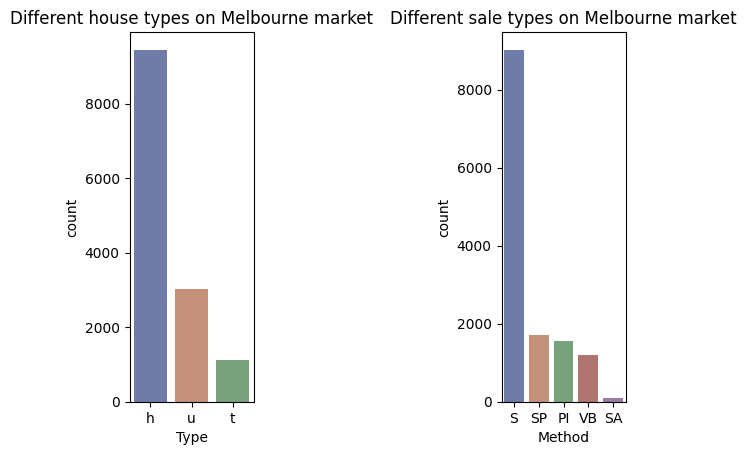

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.countplot(
    data=df_house, 
    x="Type",
    # errorbar="sd", 
    palette="dark", 
    alpha=.6,
    ax=ax1
)
ax1.set_title('Different house types on Melbourne market')

sns.countplot(
    data=df_house, 
    x="Method",
    # errorbar="sd", 
    palette="dark", 
    alpha=.6,
    ax=ax2
)
ax2.set_title('Different sale types on Melbourne market')
plt.subplots_adjust(wspace=2)
plt.show()

# g.despine(left=True)
# g.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("Different house type on Melbourne market")

## For this housing dataset, we have totally 21 columns and 13580 row. It is a data of Melbourne housing sales within the year 2016-2017. The data contains basic information about houses.
### - Type: Property type.
#### T: townhouse 
#### U: unit
#### H:house.
### - Distance: Distance between Melbourne CBD and the property.
### - Address: Address for the property.
### - Postcode: Postcode for the property.
### - Suburb: Suburb for the property.
### - Latitude, Longitude: the geographic information for the property. 
### - Rooms, Bedroom2, Bathroom, Car: The number of rooms, bathrooms, and parking spaces provided in the property.
### - BuildingArea: building area
### - YearBuilt: Year of built.
### - Landsize: Land size.
### - CouncilArea: Council that the property belong to. 
### - Regionname: Region.
## It also includes sales information: 
### - Date: Date of sold. 
### - Price: price of sold.
### - SellerG: selling agent
### - Method: selling method.
####      S - property sold; 
####      SP - property sold prior; 
####      PI - property passed in; 
####      VB - vendor bid; 
####      SA - sold after auction; 
### - Propertycount: Property that still on the market for sale.

In [8]:
df_house.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [9]:
df_house.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

### Through preliminary observation of the data, we can identify some unusual means:
### 1. Postcode. which should be of type "object", but in the data, it appears as "float".
### 2. Bedroom number, bathroom number and car number, should be the same data type of 'rooms', but it shows 'float'.
### 3. Date. Should be datetime.
### 4. Year. Should be interger.
### All this data type need to be fixed to the correct data type.

In [10]:
df_house.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### In the df_house data, it do have different null values.
### Car space: 62
### Building Area: 6450
### Year of Built: 5375
### Council Area: 1369

## 2. After a basic research of the raw data, now we need to fill the missing data.

### 2.1 Car

In [11]:
df_house[df_house['Car'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12221,Ascot Vale,132 The Parade,3,h,985000.0,S,Brad,3/09/2017,4.3,3032.0,3.0,1.0,NaN,245.0,91.0,1945.0,NaN,-37.77215,144.91144,Western Metropolitan,6567.0
12247,Brunswick East,18 Ethel St,2,h,1023000.0,S,Domain,3/09/2017,4.0,3057.0,2.0,1.0,NaN,154.0,76.0,1890.0,NaN,-37.77221,144.97537,Northern Metropolitan,5533.0
12259,Clifton Hill,34 Fenwick St,3,h,1436000.0,S,Jellis,3/09/2017,3.6,3068.0,3.0,2.0,NaN,123.0,128.0,1990.0,NaN,-37.78888,145.00036,Northern Metropolitan,2954.0
12320,Glen Waverley,19 Diamond Av,3,h,1370000.0,S,Fletchers,3/09/2017,16.7,3150.0,3.0,1.0,NaN,652.0,NaN,NaN,NaN,-37.87170,145.17267,Eastern Metropolitan,15321.0
12362,Newport,11 Collingwood Rd,4,h,1180000.0,PI,Williams,3/09/2017,6.2,3015.0,4.0,1.0,NaN,545.0,NaN,NaN,NaN,-37.84399,144.89125,Western Metropolitan,5498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,Moonee Ponds,46 Eglinton St,4,h,1525000.0,S,Nelson,26/08/2017,6.2,3039.0,4.0,3.0,NaN,233.0,NaN,NaN,NaN,-37.76884,144.91708,Western Metropolitan,6232.0
13508,North Melbourne,9 Erskine St,2,h,1080000.0,S,Jellis,26/08/2017,1.8,3051.0,2.0,1.0,NaN,100.0,67.0,1890.0,NaN,-37.79524,144.94642,Northern Metropolitan,6821.0
13522,Port Melbourne,201 Stokes St,2,h,1515000.0,SP,Marshall,26/08/2017,3.5,3207.0,2.0,2.0,NaN,197.0,NaN,NaN,NaN,-37.83754,144.93954,Southern Metropolitan,8648.0
13524,Prahran,17 Packington Pl,2,h,1365000.0,S,Jellis,26/08/2017,4.6,3181.0,2.0,1.0,NaN,206.0,100.0,1900.0,NaN,-37.85569,145.00522,Southern Metropolitan,7717.0


### After doing the online reserch, we can realize that all the property information with null car spot, which is because they are 'Terrace house' and with no equipped parking space. We can fill the null value with 0.

In [12]:
df_house['Car'] = df_house['Car'].fillna(df_house[df_house['Car'].isnull()]['Car'] == 0)

### 2.2 Building Area. 

In [13]:
# pd.set_option('display.max_row', None)
df_house.loc[df_house['BuildingArea'].isnull()].head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,1.0,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,2.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8110,145.0067,Northern Metropolitan,4019.0
13,Abbotsford,45 William St,2,h,1172500.0,S,Biggin,13/08/2016,2.5,3067.0,2.0,1.0,1.0,195.0,NaN,NaN,Yarra,-37.8084,144.9973,Northern Metropolitan,4019.0
14,Abbotsford,7/20 Abbotsford St,1,u,441000.0,SP,Greg,14/05/2016,2.5,3067.0,1.0,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8016,144.9988,Northern Metropolitan,4019.0
18,Abbotsford,196 Nicholson St,3,h,955000.0,S,Collins,17/09/2016,2.5,3067.0,3.0,1.0,0.0,183.0,NaN,NaN,Yarra,-37.8022,144.9975,Northern Metropolitan,4019.0
21,Abbotsford,13/11 Nicholson St,3,t,900000.0,S,Beller,18/03/2017,2.5,3067.0,3.0,2.0,2.0,0.0,NaN,2010.0,Yarra,-37.8093,144.9959,Northern Metropolitan,4019.0
26,Abbotsford,5/20 Abbotsford St,1,u,426000.0,SP,Greg,22/08/2016,2.5,3067.0,1.0,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8016,144.9988,Northern Metropolitan,4019.0


### 2.3 CouncilArea


In [14]:
# pd.set_option('display.max_row', None)
df_house.loc[df_house['CouncilArea'].isnull()].head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7584,Brighton East,7 Roberts Ct,3,h,1270000.0,VB,Ray,20/05/2017,10.7,3187.0,3.0,1.0,3.0,724.0,NaN,NaN,NaN,-37.92910,145.02970,Southern Metropolitan,6938.0
10797,Reservoir,48 Crevelli St,3,h,526250.0,SP,Barry,8/07/2017,12.0,3073.0,3.0,1.0,1.0,308.0,NaN,NaN,NaN,-37.72828,145.03033,Northern Metropolitan,21650.0
12213,Aberfeldie,1 Alma St,4,h,1436000.0,S,Brad,3/09/2017,7.5,3040.0,4.0,3.0,3.0,511.0,187.0,1922.0,NaN,-37.75788,144.90487,Western Metropolitan,1543.0
12214,Albion,40 Ridley St,5,h,905000.0,S,hockingstuart,3/09/2017,10.5,3020.0,5.0,2.0,3.0,732.0,NaN,1925.0,NaN,-37.78345,144.82295,Western Metropolitan,2185.0
12215,Alphington,22 Harker St,4,h,1680000.0,S,Love,3/09/2017,5.7,3078.0,4.0,3.0,2.0,720.0,NaN,NaN,NaN,-37.77928,145.02993,Northern Metropolitan,2211.0
12216,Altona,86 Grieve Pde,3,h,913000.0,S,Greg,3/09/2017,11.0,3018.0,3.0,2.0,3.0,530.0,148.0,1985.0,NaN,-37.86140,144.81931,Western Metropolitan,5301.0
12217,Altona Meadows,96 Linden St,3,h,590000.0,PI,hockingstuart,3/09/2017,15.5,3028.0,3.0,1.0,2.0,459.0,NaN,NaN,NaN,-37.87063,144.77632,Western Metropolitan,7630.0
12218,Altona North,95 Marion St,3,h,1070000.0,PI,RT,3/09/2017,9.4,3025.0,3.0,1.0,3.0,693.0,134.0,1950.0,NaN,-37.83511,144.84905,Western Metropolitan,5132.0
12219,Armadale,121 Kooyong Rd,4,h,5100000.0,S,Marshall,3/09/2017,6.3,3143.0,4.0,2.0,2.0,761.0,255.0,1900.0,NaN,-37.85249,145.02091,Southern Metropolitan,4836.0
12220,Armadale,2/26 Mercer Rd,2,u,820000.0,S,Jellis,3/09/2017,6.3,3143.0,2.0,1.0,1.0,1501.0,NaN,NaN,NaN,-37.85280,145.02684,Southern Metropolitan,4836.0


#### Through doing research about the raw, we first use the existing value to fill the council data

In [15]:
council_null = df_house[df_house['CouncilArea'].isnull()]['Suburb']
council_null.head(20)

7584      Brighton East
10797         Reservoir
12213        Aberfeldie
12214            Albion
12215        Alphington
12216            Altona
12217    Altona Meadows
12218      Altona North
12219          Armadale
12220          Armadale
12221        Ascot Vale
12222         Balaclava
12223      Balwyn North
12224      Balwyn North
12225      Balwyn North
12226      Balwyn North
12227         Bayswater
12228    Bentleigh East
12229    Bentleigh East
12230    Bentleigh East
Name: Suburb, dtype: object

In [16]:
council_not_null = df_house[~df_house['CouncilArea'].isnull()][['Suburb','CouncilArea']]
council_not_null.head(20)

,Suburb,CouncilArea
0,Abbotsford,Yarra
1,Abbotsford,Yarra
2,Abbotsford,Yarra
3,Abbotsford,Yarra
4,Abbotsford,Yarra
5,Abbotsford,Yarra
6,Abbotsford,Yarra
7,Abbotsford,Yarra
8,Abbotsford,Yarra
9,Abbotsford,Yarra


In [17]:
#Find council name from the exist row
def find_council(x):
    # print(x)
    suburb = x.strip()
    suburb_with_council = council_not_null[council_not_null['Suburb'] == x].reset_index(drop=True)
    if len(suburb_with_council) == 0:
        return 'unknown'
    else:
        # print(suburb_with_council)
        return suburb_with_council['CouncilArea'][0]
        

In [18]:
find_council('Abbotsford')

'Yarra'

In [19]:
# council_not_null[council_not_null['Suburb'] == 'Brighton East']   
df_house.loc[df_house['CouncilArea'].isnull(), 'CouncilArea'] = df_house[df_house['CouncilArea'].isnull()]['Suburb'].apply(find_council)
df_house

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,Monash,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,Hobsons Bay,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,Hobsons Bay,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,Hobsons Bay,-37.85908,144.89299,Western Metropolitan,6380.0


#### After applying the function, we onlu have 7 suburb couldn't find existing data. we need to manually add their council name.

In [20]:
df_house.loc[df_house['CouncilArea'] == 'unknown'].head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12251,Burnside,22 Paringa Wy,3,h,657500.0,SP,Harcourts,3/09/2017,14.8,3023.0,3.0,2.0,2.0,631.0,NaN,NaN,unknown,-37.75225,144.75520,Western Metropolitan,1607.0
12438,Attwood,2 Herod Pl,3,h,640000.0,SP,YPA,9/09/2017,16.5,3049.0,3.0,2.0,2.0,607.0,NaN,NaN,unknown,-37.67379,144.89826,Northern Metropolitan,1130.0
12865,Wallan,14 Danaher Av,3,h,366000.0,S,Ray,16/09/2017,44.2,3756.0,3.0,1.0,1.0,502.0,77.0,1978.0,unknown,-37.40853,144.97749,Northern Victoria,3988.0
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,5.0,3.0,5.0,44500.0,44515.0,NaN,unknown,-37.45392,144.58864,Northern Victoria,849.0
13264,Plumpton,9 Remy Av,4,h,625500.0,SP,HAR,23/09/2017,23.8,3335.0,4.0,2.0,2.0,477.0,178.0,2012.0,unknown,-37.71429,144.72492,Western Metropolitan,1490.0
13381,Burnside,18 Fydler Av,3,h,580000.0,S,YPA,26/08/2017,14.8,3023.0,3.0,2.0,2.0,461.0,174.0,2000.0,unknown,-37.74518,144.74708,Western Metropolitan,1607.0
13494,Monbulk,21 David St,4,h,720000.0,SP,Fletchers,26/08/2017,34.1,3793.0,4.0,2.0,2.0,1611.0,NaN,NaN,unknown,-37.87931,145.41288,Eastern Victoria,1424.0


In [21]:
# Find the rest unknown council name which has no existing information in the datasset
df_house['CouncilArea'][12251].replace('Melton', 'unknown')
df_house['CouncilArea'][12438].replace('Hume','unknown')
df_house['CouncilArea'][12865].replace('Mitchell','unknown')
df_house['CouncilArea'][13245].replace('Macedon Ranges','unknown')
df_house['CouncilArea'][13264].replace('Melton','unknown')
df_house['CouncilArea'][13381].replace('Melton','unknown')
df_house['CouncilArea'][13494].replace('Yarra Ranges','unknown')

'unknown'

In [22]:
df_house['CouncilArea'].isnull().sum()

0

#### Now no missing data in council columns.

### 2.4 YearBuilt

### check null,classification

### bar chart (type),有几种roomes， how to fill.

# Use case

## 2.1. Location

### 2.1.1 What is the distribution of Melbourne house from the dataset according to different house type?


<Axes: >

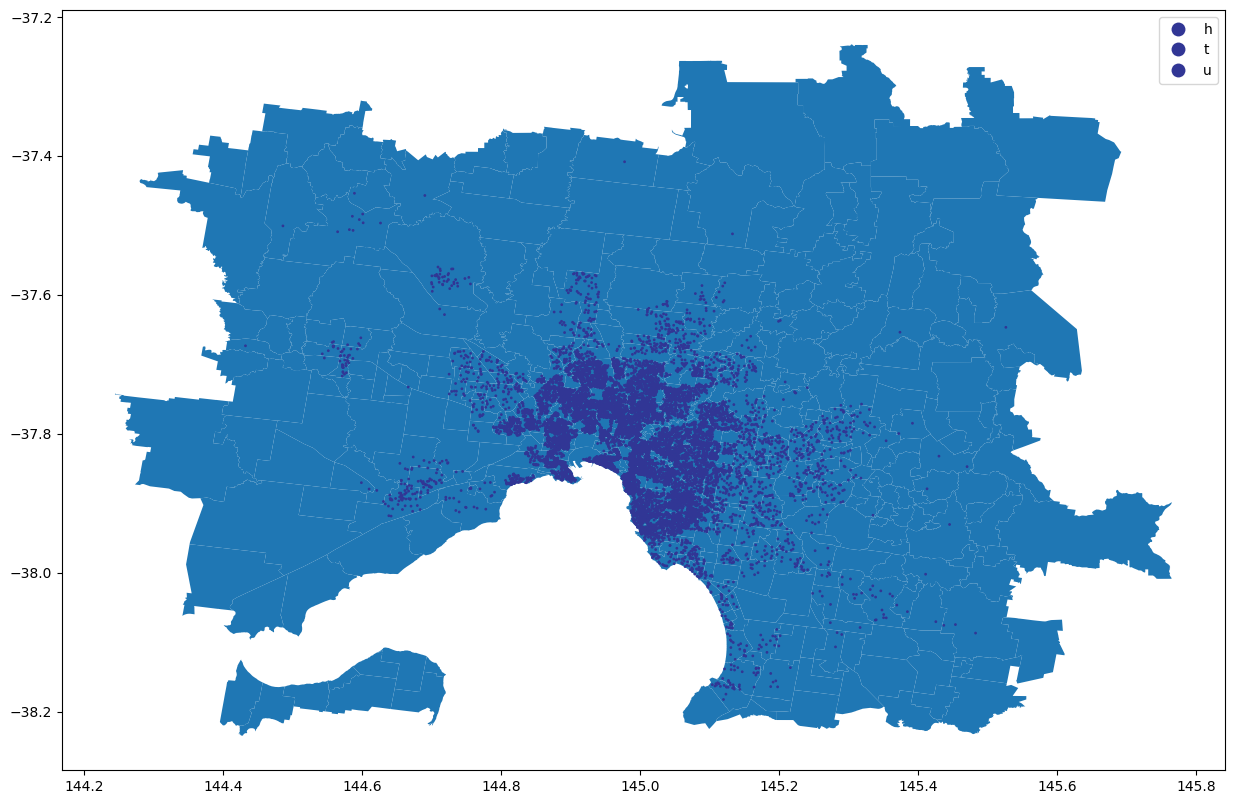

In [57]:
#plot all the property location
geometry = [Point(xy) for xy in zip(df_house['Longtitude'], df_house['Lattitude'])]
gdf = GeoDataFrame(df_house, geometry=geometry)  
#set boundaries
long_max = df_house['Longtitude'].max()
long_min = df_house['Longtitude'].min()
lat_max = df_house['Lattitude'].max()
lat_min = df_house['Lattitude'].min()
# read shapefile
victoria = gpd.read_file('/Users/vanessali/Desktop/Melbourne_house/vic_shape')
mel = victoria.cx[long_min:long_max, lat_min:lat_max]
gdf.plot(column='Type',  cmap='RdYlBu', legend=True, ax=mel.plot(figsize=(15, 11)), marker='o', markersize=1, vmin=-38, vmax=-37)

## 2.2. House

## 2.3 Price

### Q2.3.1 What is the main feature that affect the house price?

In [11]:
#property type, location, room number, 研究不同的关系，不同的因素对房价的影响,地区均价分布

#### Distance

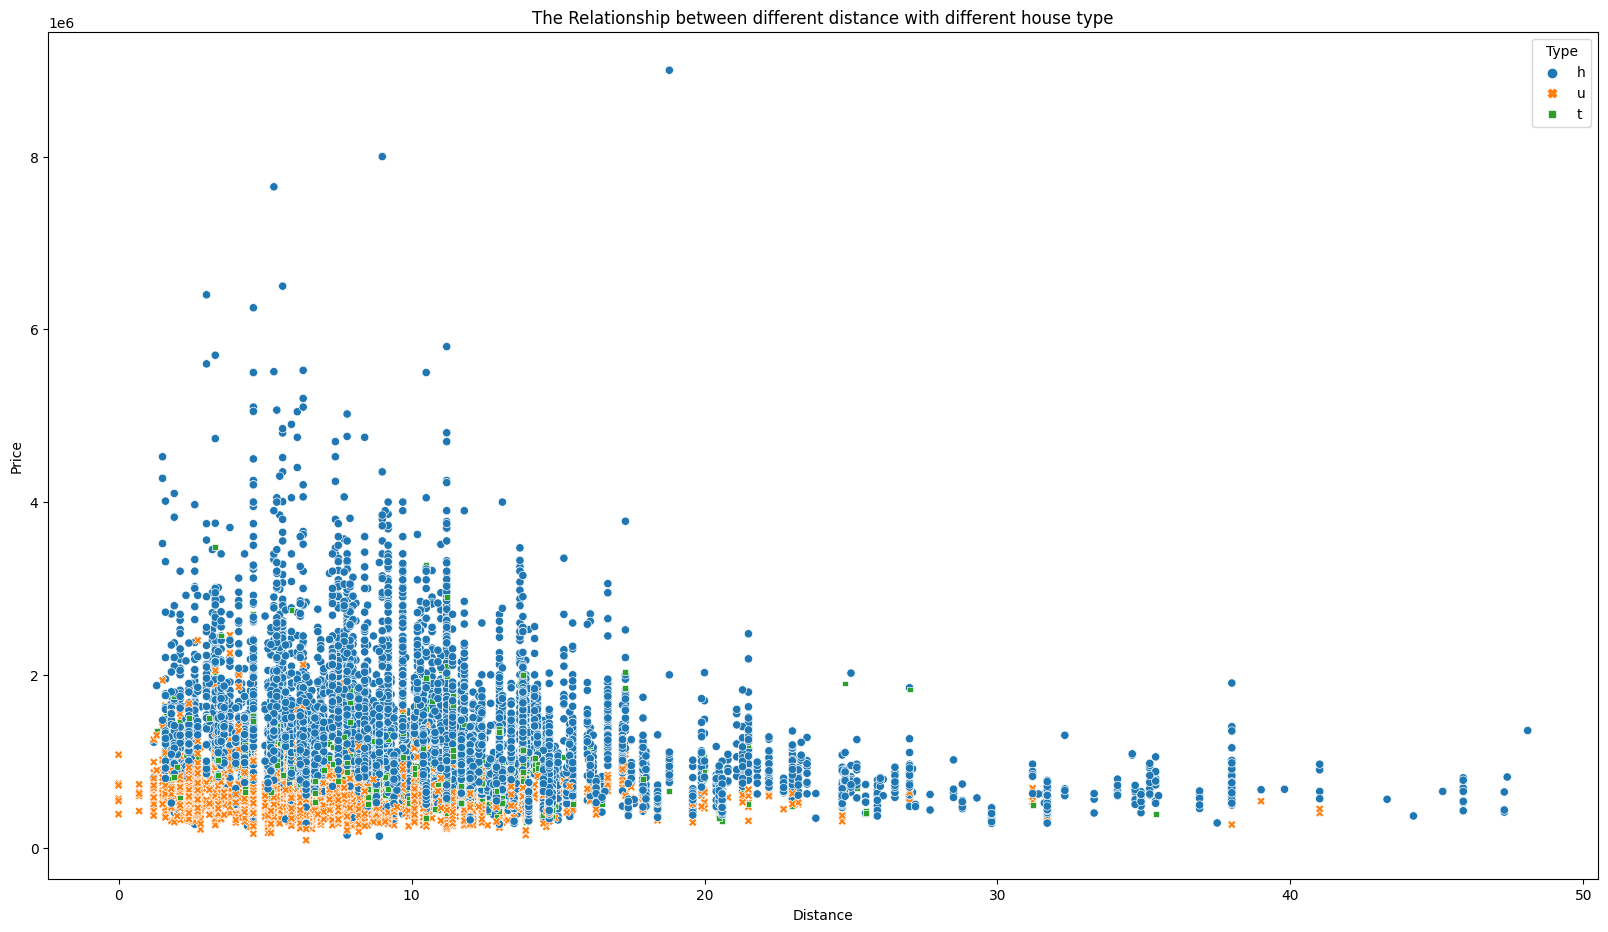

In [69]:
plt.figure(figsize=(20, 11))
sns.scatterplot(data=df_house, x="Distance", y="Price",hue="Type", style="Type",legend=True)   
plt.title('The Relationship between different distance with different house type')
plt.show()

### House Type

<Figure size 2000x1100 with 0 Axes>

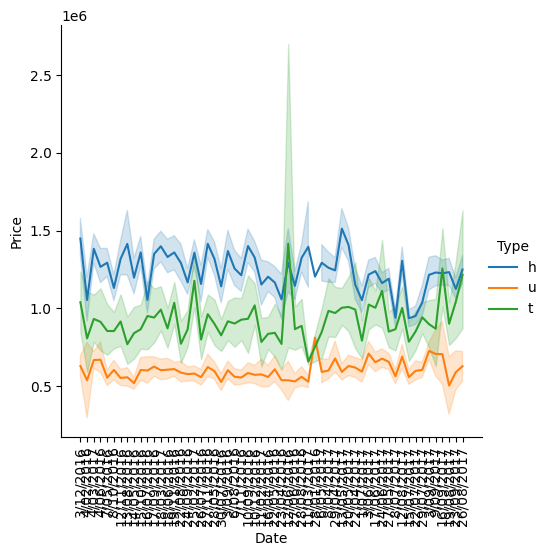

In [75]:
plt.figure(figsize=(20, 11))
sns.relplot(x='Date',y='Price',data=df_house,kind='line',hue='Type')
plt.xticks(rotation=90)
plt.show()

### Rome number 

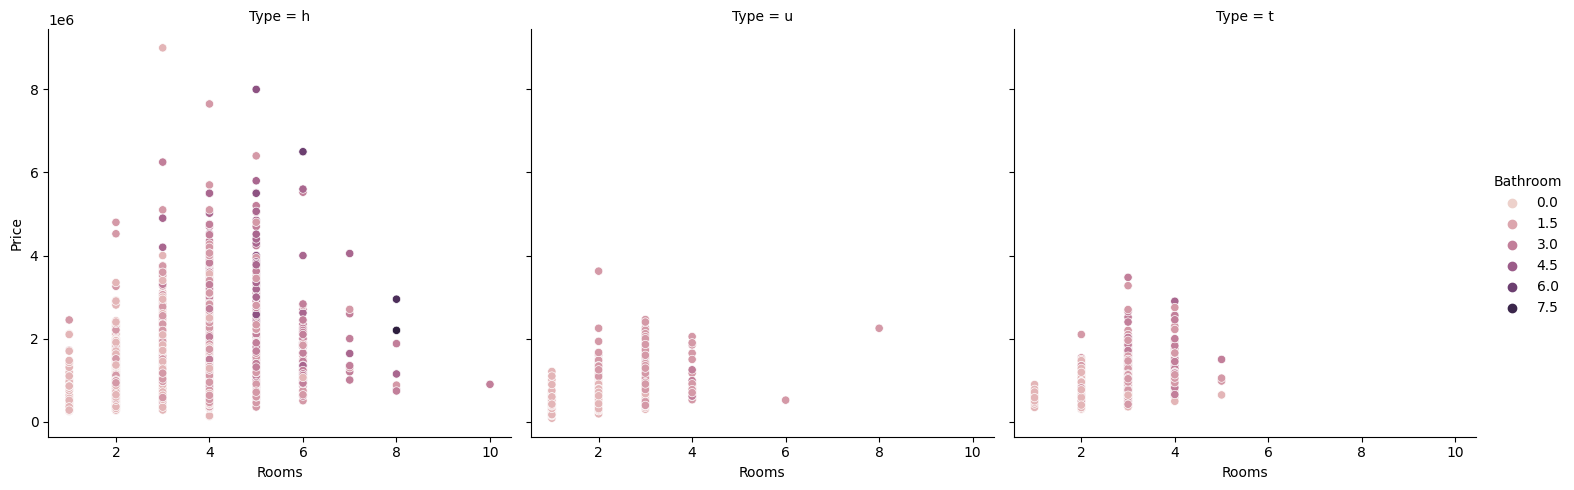

In [70]:
sns.relplot(x='Rooms',y='Price',data=df_house,kind='scatter',hue='Bathroom', col='Type',legend=True)

## 2.4 Selling

In [15]:
## selling situation 

## 2.5 melbourne market

In [12]:
## Q1.6 In the overall timeline, is the housing price rising or falling? Which month is the peak period for transactions? 

In [13]:
##房屋销售情况，timeline， suburb

### Q1.1: any relationship between distance and price according to different suburbs

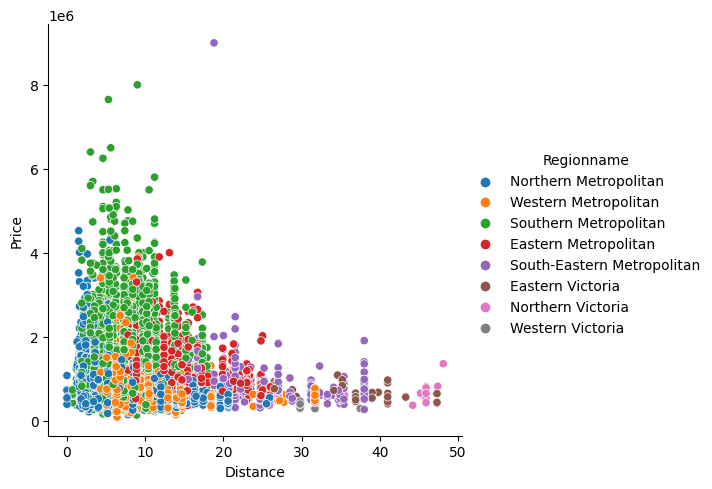

In [36]:
sns.relplot(x='Distance',y='Price',data=df_house,kind='scatter',hue='Regionname')

(0.0, 20000.0)

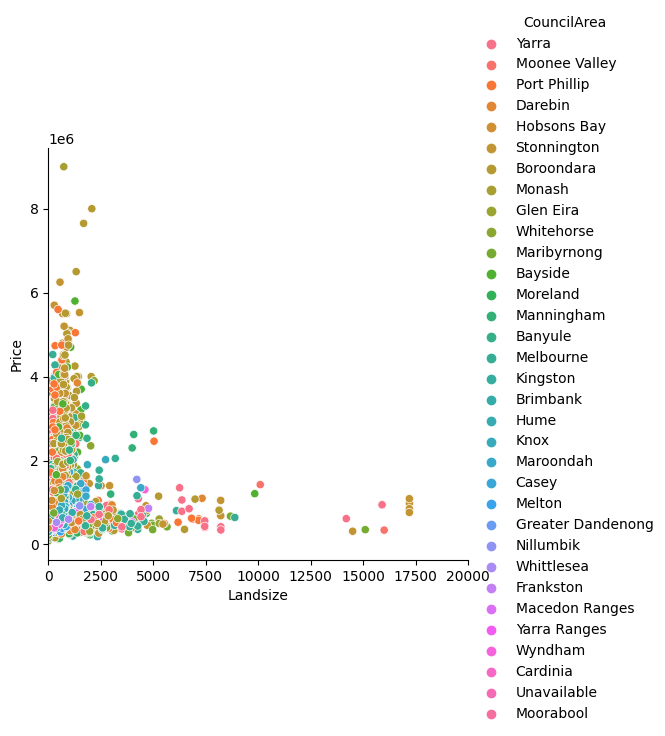

In [40]:
sns.relplot(x='Landsize',y='Price',data=df_house,kind='scatter',hue='CouncilArea')
plt.xlim(0, 20000)

## Q1.2 Any price difference between eastern suburb, northern suburb, western suburb, southern suburb?

## Q1.4 Which suburb(postcode) has the higest price?

## Q1.5 What is the median price for differenct suburb?

## Q1.6 In the overall timeline, is the housing price rising or falling? Which month is the peak period for transactions? 

## Q1.7 Does the construction year of a house have an impact on its price?

## Q1.8 Any effect from bedroom number on price? 

## Q1.9 Any effect from hose type on price?

## Q1.10: Any Regression Analysis I can do to predict the price trand according to different suburb, house type, land size and construction year?

## Q1.11: Which concil has better performance on price?

## Q1.12: Which suburb has the fastest price growth, and which district is experiencing the steepest decline?